In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('2015.csv')

### DATA DICTIONARY
FL_DATE -> Flight Date
<br>
OP_CARRIER -> Carrier Name
<br>
OP_CARRIER_FL_NUM -> Carrier flight number
<br>
ORIGIN -> Origin Airport
<br>
DEST -> Destination airport
<br>
CRS_DEP_TIME -> CRS,   Scheduled Departure Time (local time: hhmm)
<br>
DEP_TIME -> Actual Departure Time (local time: hhmm)
<br>
DEP_DELAY -> Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.
<br>
TAXI_OUT -> Taxi Out Time, in Minutes;  The time elapsed between departure from the origin airport gate and
wheels off, in minutes
<br>
WHEELS_OFF -> Wheels Off Time (local time: hhmm)
<br>
WheelsOn -> Wheels On Time (local time: hhmm)
<br>
TAXI_IN -> Wheels down and arrival at the destination airport gate, in minutes ; Taxi In Time, in Minutes
<br>
CRS_ARR_TIME -> scheduled arrival time (local, hhmm)
<br>
ARR_TIME -> Actual Arrival Time (local time: hhmm)
<br>
ARR_DELAY -> Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
<br>
CANCELLED -> Cancelled Flight Indicator (1=Yes); was the flight cancelled?
<br>
CANCELLATION_CODE -> reason for cancellation (A = carrier, B = weather, C = NAS, D =
security
<br>
DIVERTED -> Diverted Flight Indicator (1=Yes)
<br>
CRS_ELAPSED_TIME -> CRS Elapsed Time of Flight (estimated elapse time), in minutes
<br>
ACTUAL_ELAPSED_TIME -> Elapsed Time of Flight, in Minutes
<br>
AIR_TIME -> Flight Time, in Minutes
<br>
DISTANCE -> Distance between airports (miles)
<br>
CARRIER_DELAY -> Carrier Delay, in Minutes
<br>
WEATHER_DELAY -> Weather Delay, in Minutes
<br>
NAS_DELAY -> National Air System Delay, in Minutes
<br>
SECURITY_DELAY -> Security Delay, in Minutes
<br>
LATE_AIRCRAFT_DELAY-> Late Aircraft Delay, in Minutes
<br>
### Extra
Computer Reservation System. CRS provides information on airline schedules, fares and seat availability to travel agencies and allow agents to book seats and issue tickets.)

In [4]:
df['DEP_DELAY']

0          -4.0
1          14.0
2          12.0
3          11.0
4          -3.0
           ... 
5819074     0.0
5819075    88.0
5819076    72.0
5819077    10.0
5819078    87.0
Name: DEP_DELAY, Length: 5819079, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [6]:
# Number of null values across columns
null_Col = [(i, df[i].isnull().sum()) for i in df.columns if df[i].isnull().sum() > 0]
pd.DataFrame(null_Col, columns=['Features', 'Null values'])

,Features,Null values
0,DEP_TIME,86153
1,DEP_DELAY,86153
2,TAXI_OUT,89047
3,WHEELS_OFF,89047
4,WHEELS_ON,92513
5,TAXI_IN,92513
6,ARR_TIME,92513
7,ARR_DELAY,105071
8,CANCELLATION_CODE,5729195
9,CRS_ELAPSED_TIME,6


### Analysis

In [7]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2015-01-01,NK,195,MCO,FLL,2147,2143.0,-4.0,15.0,2158.0,2238.0,7.0,2250,2245.0,-5.0,0.0,NaN,0.0,63.0,62.0,40.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,NK,197,LGA,FLL,1050,1104.0,14.0,20.0,1124.0,1354.0,9.0,1404,1403.0,-1.0,0.0,NaN,0.0,194.0,179.0,150.0,1076.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,NK,198,FLL,MCO,700,712.0,12.0,19.0,731.0,803.0,10.0,757,813.0,16.0,0.0,NaN,0.0,57.0,61.0,32.0,177.0,0.0,0.0,16.0,0.0,0.0,NaN
3,2015-01-01,NK,199,IAH,LAS,2240,2251.0,11.0,8.0,2259.0,2343.0,4.0,2356,2347.0,-9.0,0.0,NaN,0.0,196.0,176.0,164.0,1222.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,NK,200,IAH,ORD,623,620.0,-3.0,15.0,635.0,830.0,10.0,855,840.0,-15.0,0.0,NaN,0.0,152.0,140.0,115.0,925.0,NaN,NaN,NaN,NaN,NaN,NaN


### Problem Statement:- Predicting departure delay

### Pre-Analysis

### Important Variables
FL_DATE -> Can extract dayofweek, month and year
<br>
OP_CARRIER -> Flight Name
<br>
ORIGIN -> Origin Airport
<br>
CRS_DEP_TIME -> Scheduled Departure Time
<br>
DEP_DELAY
<br>

### Variables Not Required
OP_CARRIER_FL_NUM -> Flight number(Not important)
<br>
DEST -> Destination airport (Not needed since we are focusing on departure delay)
<br>
DEP_TIME -> Actual Departure Time (local time: hhmm)
<br>
TAXI_OUT, WHEELS_OFF, WheelsOn, TAXI_IN are not needed
<br>
CRS_ARR_TIME, ARR_TIME & ARR_DELAY maybe not needed since we are focusing on departure delay
<br>
CANCELLED
<br>
Cancellation Code
<br>
Diverted -> Diverted Flight Indicator (1=Yes)
<br>
Different DELAYs :- Carrier, weather, nas, security and late_aircraft(due to high amount of null values)

In [74]:
df1 = df.copy()
df1['POS_DEP_DELAY'] = df1['DEP_DELAY'].apply(lambda x: x if x > 0 else 0)

## DEP_DELAY

In [75]:
(df1['DEP_DELAY']>0).value_counts(normalize=True)*100

DEP_DELAY
False    63.471573
True     36.528427
Name: proportion, dtype: float64

55% -> departure delays of more than 0 mins
<br>
45% -> No delay or early departure

In [76]:
df1['DEP_DELAY'].value_counts()

DEP_DELAY
-3.0       455407
-4.0       444053
-5.0       438844
-2.0       435237
-1.0       387475
            ...  
 1334.0         1
 884.0          1
 904.0          1
 1140.0         1
 1649.0         1
Name: count, Length: 1217, dtype: int64

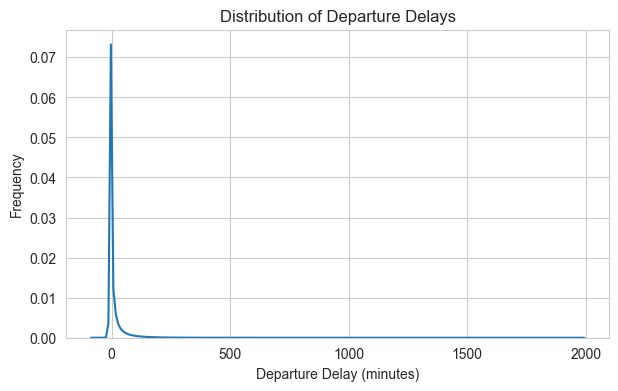

In [77]:
# 1. Overall distribution of departure delays
plt.figure(figsize=(7, 4))
sns.kdeplot(data=df1, x="DEP_DELAY")
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
# plt.xlim(-50, 300)  
plt.show()

In [78]:
df[df['DEP_DELAY']>500]['DEP_DELAY'].describe()

count    2273.000000
mean      725.241091
std       221.783228
min       501.000000
25%       554.000000
50%       652.000000
75%       835.000000
max      1988.000000
Name: DEP_DELAY, dtype: float64

Most flights tend to depart around their scheduled time, with a peak just before 0, indicating on-time or slightly early departures. However, there's a long tail to the right, showing that while less common, significant delays do occur.
<br>
Understand the data related to very high delays
<br>
We have a lot of flights whose delay was too high, but still they took off and landed(No cancellation).

1. Either use the positive departure delays for a regression model.
2. Or do classification for specific delays(low, mid, high) and no delay.

## FL_DATE

In [79]:
# Convert FL_DATE from string to datetime
df1['FL_DATE'] = pd.to_datetime(df1['FL_DATE'])
df1['Month'] = df1['FL_DATE'].dt.month

In [80]:
# 1. Flight count per month
flight_counts = df1.groupby(['Month']).size().reset_index(name='Count')

In [81]:
# 2. Average delay per month (considering only positive delays)
df1['POS_DEP_DELAY'] = df1['DEP_DELAY'].apply(lambda x: x if x > 0 else 0)
average_delay = df1.groupby(['Month'])['POS_DEP_DELAY'].mean().reset_index(name='AverageDelay')

#### Flight Counts Per Month & Average Departure Delay Per Month

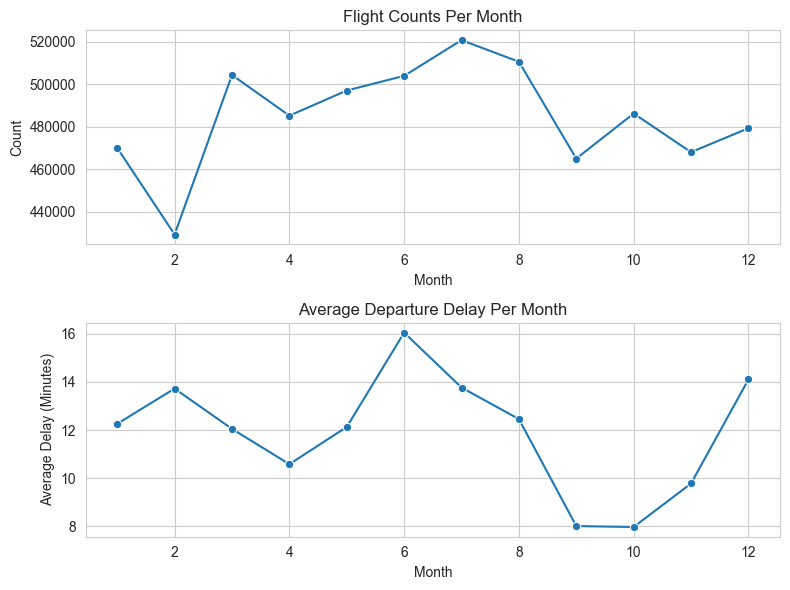

In [82]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

# Flight counts
sns.lineplot(data=flight_counts, x='Month', y='Count', marker='o', ax=ax[0])
ax[0].set_title('Flight Counts Per Month')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Count')

# 2. Average delay per month (considering only positive delays)
sns.lineplot(data=average_delay, x='Month', y='AverageDelay', marker='o', ax=ax[1])
ax[1].set_title('Average Departure Delay Per Month')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Average Delay (Minutes)')
plt.tight_layout()
plt.show()

Flight Counts Per Month: This plot shows the total number of flights each month across different years. It could reveal seasonal patterns in air travel, such as peak periods during holidays or summer months. No year-to-year comparisons

Average Departure Delay Per Month: This chart presents the average departure delay (in minutes) for flights each month. Trends in this graph can indicate months where delays are typically longer, possibly due to weather conditions, higher traffic volumes, or other factors. This plot shows the average departure delay varies over time, with some months experiencing higher average delays than others. Good variability.
Try to understand why there were less delays during Sep-Oct and why it increased in the following years

In [84]:
df1['CRS_DEP_TIME'] = df1['CRS_DEP_TIME'].apply(lambda x: f"{x:04}").apply(lambda x: f"{x[:2]}:{x[2:]}")

#### Trend of Avg Departure Delays Over Hour of Day

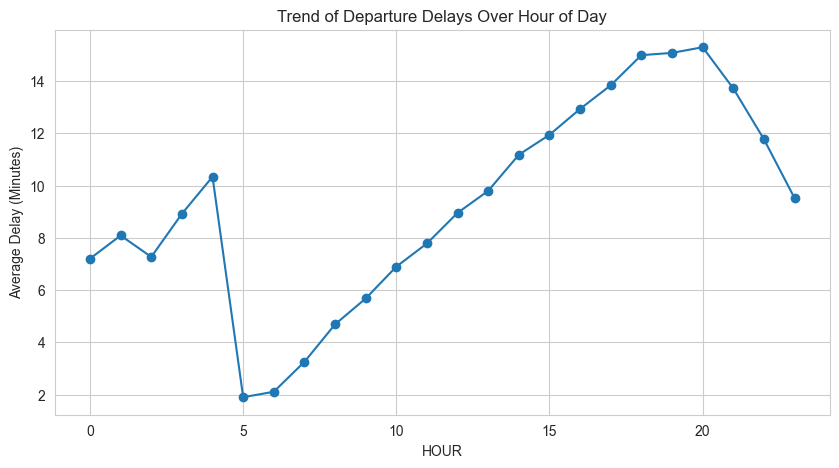

In [110]:
df1['HOUR'] = pd.to_datetime(df1['CRS_DEP_TIME'], format = '%H:%M').dt.hour
# day_of_week_delay_rate = df1.groupby('HOUR')['DEP_DELAY'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df1.groupby('HOUR')['DEP_DELAY'].mean(), marker='o')
plt.title('Trend of Departure Delays Over Hour of Day')
plt.xlabel('HOUR')
plt.ylabel('Average Delay (Minutes)')
plt.show()

In [86]:
df1['DayOfWeek'] = df1['FL_DATE'].dt.day_name()
# do = {'Monday': 1,'Tuesday': 2,'Wednesday': 3,'Thursday': 4,'Friday': 5,'Saturday': 6,'Sunday': 7}
# df1['DayOfWeek'] = df1['DayOfWeek'].map(do)
df1['DayOfWeek'] = pd.Categorical(df1['DayOfWeek'],
                                  categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
                                  ordered=True)

#### Trend of Avg Departure Delays Over DayofWeek

Text(0, 0.5, 'Average Delay (Minutes)')

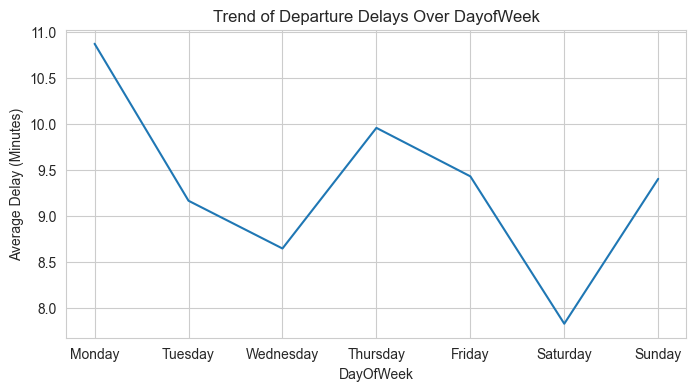

In [87]:
plt.figure(figsize=(8,4))
plt.plot(df1.groupby(['DayOfWeek'])['DEP_DELAY'].mean())
plt.title('Trend of Departure Delays Over DayofWeek')
plt.xlabel('DayOfWeek')
plt.ylabel('Average Delay (Minutes)')

#### For month, dayofweek and hour.
1) We will do target encoding based on average departure delay calculated from the training data to ensure there is no data leakage and map the encoding to the test data.
2) Or we can just use one hot encoding

### OP_CARRIER

In [88]:
df['OP_CARRIER'].value_counts()

OP_CARRIER
WN    1261855
DL     875881
AA     725984
OO     588353
EV     571977
UA     515723
MQ     294632
B6     267048
US     198715
AS     172521
NK     117379
F9      90836
HA      76272
VX      61903
Name: count, dtype: int64

#### Average Departure Delay by Carrier

Text(0, 0.5, 'Carrier')

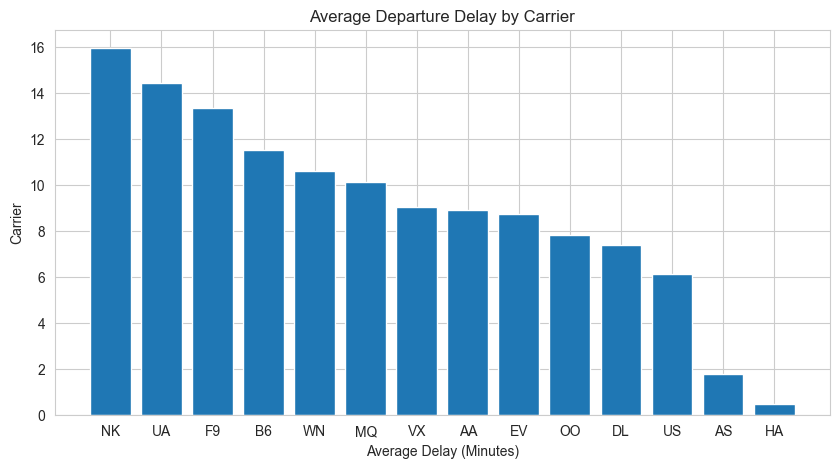

In [91]:
# 1. Average Departure Delay by Carrier
plt.figure(figsize = (10, 5))
avg_delay_by_carrier = df1.groupby('OP_CARRIER')['DEP_DELAY'].mean().reset_index().sort_values(by='DEP_DELAY', ascending=False)
plt.bar(x='OP_CARRIER', height='DEP_DELAY', data=avg_delay_by_carrier)
plt.title('Average Departure Delay by Carrier')
plt.xlabel('Average Delay (Minutes)')
plt.ylabel('Carrier')

##### It seems flight carrier has a good variability on departure delays. 
1) One hot encoding seems the best option for this variable.

### ORIGIN

In [92]:
df1['ORIGIN'].value_counts()

ORIGIN
ATL    379424
ORD    313536
DFW    260595
DEN    214191
LAX    212401
        ...  
HYA        83
GST        77
DLG        77
AKN        63
ITH        34
Name: count, Length: 322, dtype: int64

#### Top 20 Airports by Average Departure Delay

Text(0, 0.5, 'Airport')

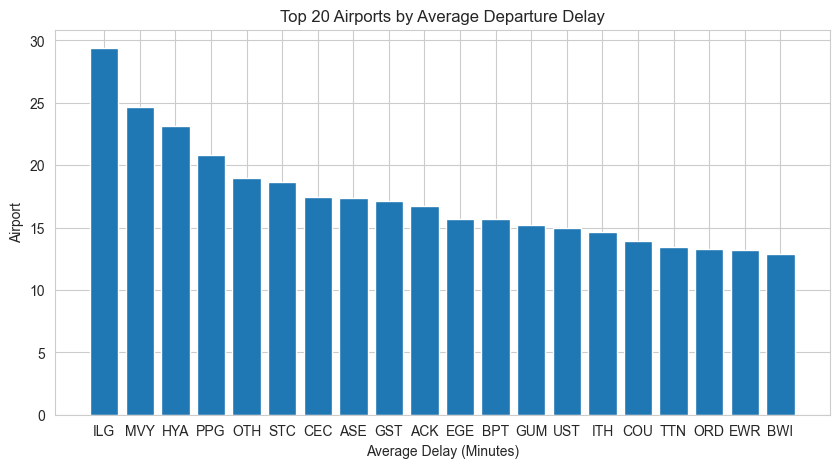

In [93]:
# Average Departure Delay by Airport
plt.figure(figsize = (10, 5))
avg_delay_by_airport = df1.groupby('ORIGIN')['DEP_DELAY'].mean().reset_index().sort_values(by='DEP_DELAY', ascending=False).head(20)
plt.bar(x='ORIGIN', height='DEP_DELAY', data=avg_delay_by_airport)
plt.title('Top 20 Airports by Average Departure Delay')
plt.xlabel('Average Delay (Minutes)')
plt.ylabel('Airport')

1) We have 322 airport locations.
<br>
2) Due to curse of dimensionality, we cannot use one hot encoding.
<br>
3) The departure airport can influence the delay through its location, size of operations and weather. What if we just add weather data?

#### No of Cancelled flights by carriers

Text(0, 0.5, 'No of Cancelled flights')

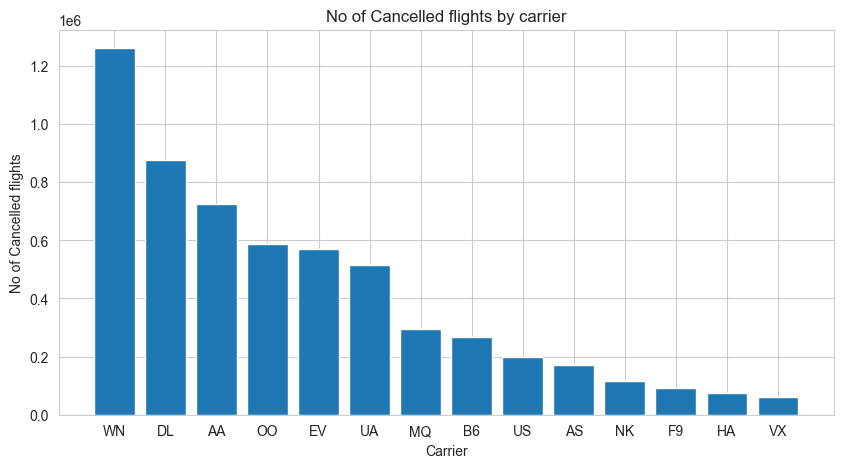

In [108]:
# Average Departure Delay by Airport
plt.figure(figsize = (10, 5))
avg_delay_by_airport = df1.groupby('OP_CARRIER')['CANCELLED'].size().reset_index().sort_values(by='CANCELLED', ascending=False)
plt.bar(x='OP_CARRIER', height='CANCELLED', data=avg_delay_by_airport)
plt.title('No of Cancelled flights by carrier')
plt.xlabel('Carrier')
plt.ylabel('No of Cancelled flights')

#### Frequency of Cancellation Reasons

In [99]:
df1['CANCELLATION_CODE'] = df1['CANCELLATION_CODE'].map(a)

Text(0, 0.5, 'Frequency')

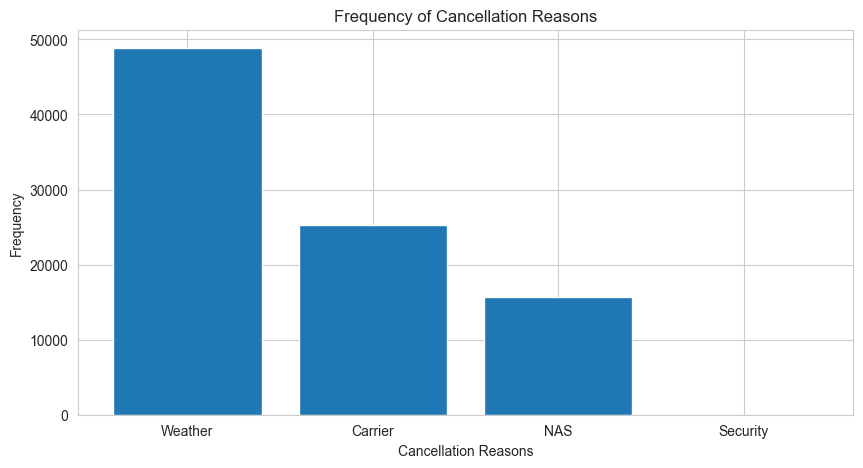

In [107]:
# Average Departure Delay by Airport
plt.figure(figsize = (10, 5))
# avg_delay_by_airport = df1.groupby('CANCELLATION_CODE').size().reset_index().sort_values(by='CANCELLATION_CODE', ascending=False)
plt.bar(x='CANCELLATION_CODE', height='count', data=df1['CANCELLATION_CODE'].value_counts().reset_index())
plt.title('Frequency of Cancellation Reasons')
plt.xlabel('Cancellation Reasons')
plt.ylabel('Frequency')

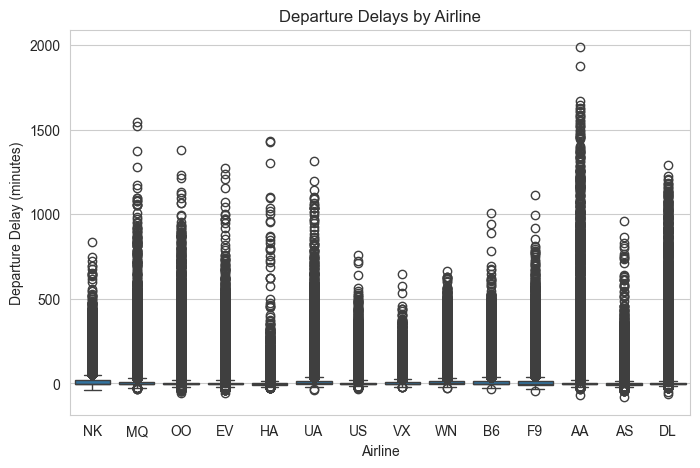

In [74]:
# 3. Departure delays by airline
plt.figure(figsize=(8, 5))
sns.boxplot(x='OP_CARRIER', y='DEP_DELAY', data=df1)
plt.title('Departure Delays by Airline')
plt.xlabel('Airline')
plt.ylabel('Departure Delay (minutes)')
# plt.ylim(-50, 150)  # Focus on a narrower range for clarity
plt.show()

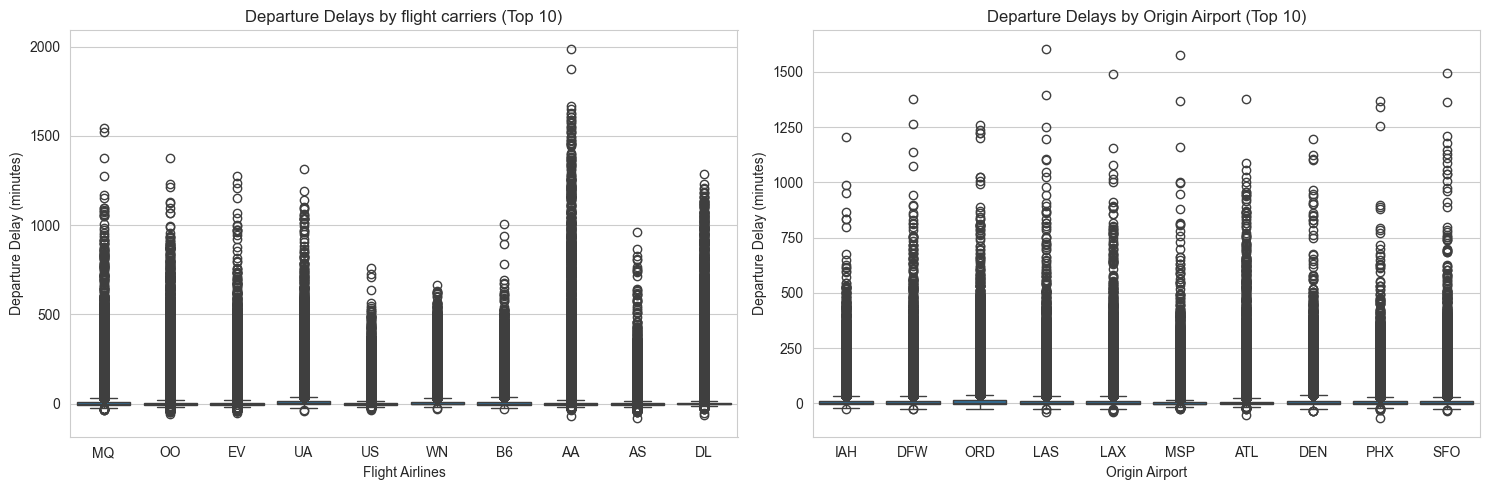

In [75]:
# Due to the large number of origin and destination airports, focusing on the top ones for clarity in visualization
top_origins = df1['ORIGIN'].value_counts().nlargest(10).index
top_carrier = df1['OP_CARRIER'].value_counts().nlargest(10).index

# 5. Departure delays by destination airport (for top 10 airports)
plt.figure(figsize=(15, 5))

plt.subplot(121)
sns.boxplot(x='OP_CARRIER', y='DEP_DELAY', data=df1[df1['OP_CARRIER'].isin(top_carrier)])
plt.title('Departure Delays by flight carriers (Top 10)')
plt.xlabel('Flight Airlines')
plt.ylabel('Departure Delay (minutes)')
# plt.ylim(-50, 50)  # Focusing on a narrower range

plt.subplot(122)
sns.boxplot(x='ORIGIN', y='DEP_DELAY', data=df1[df1['ORIGIN'].isin(top_origins)])
plt.title('Departure Delays by Origin Airport (Top 10)')
plt.xlabel('Origin Airport')
plt.ylabel('Departure Delay (minutes)')
# plt.ylim(-50, 50)  # Focusing on a narrower range

plt.tight_layout()
plt.show()

Different airlines and airports have different distributions of departure delays, suggesting that airline-specific factors (maybe management, scheduling, and operational procedures) significantly affect departure delays. 
<br>
Since we dont have access to above factors, its best not to go with a regression model.

### Why not regression?
1) Departure delay(target variable) is highly skewed. -> tried log, sqrt, cubic transformation but no luck.
2) A lot of factors that could be responsible for this would be -> management, size of operations, different delays(NAS, Security, Carrier, Late_aircraft) etc. Since we dont have it, it will be tough for a model to justify these highly skewed values. We may cutoff some higher values but still we will have the same skewness issue because most of the delays are centered from -10 to +10.
3) 

## Analysis of Dichotomous delays

In [76]:
df2 = df1.copy()
df2['DEP_DELAY'] = (df2['DEP_DELAY'] > 0).astype(int)

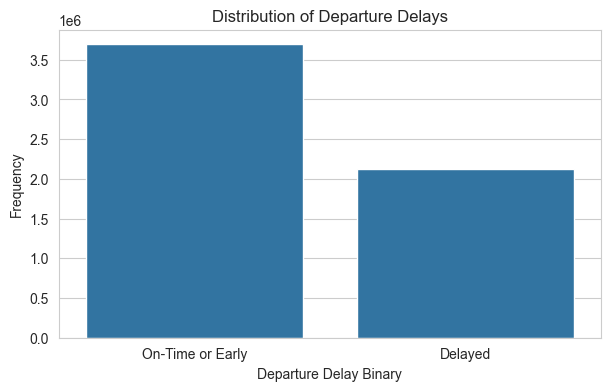

In [77]:
plt.figure(figsize=(7, 4))
sns.countplot(x='DEP_DELAY', data=df2)
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay Binary')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['On-Time or Early', 'Delayed'])
plt.show()

In [78]:
df2['DEP_DELAY'].value_counts(normalize=True)

DEP_DELAY
0    0.634716
1    0.365284
Name: proportion, dtype: float64

##### The dataset is imbalanced. Apply SMOTE technique.
##### The dataset exhibits an imbalance with approximately 63% of flights being on time or early and about 37% delayed. This imbalance suggests the necessity for strategies like SMOTE to balance the dataset for modeling.

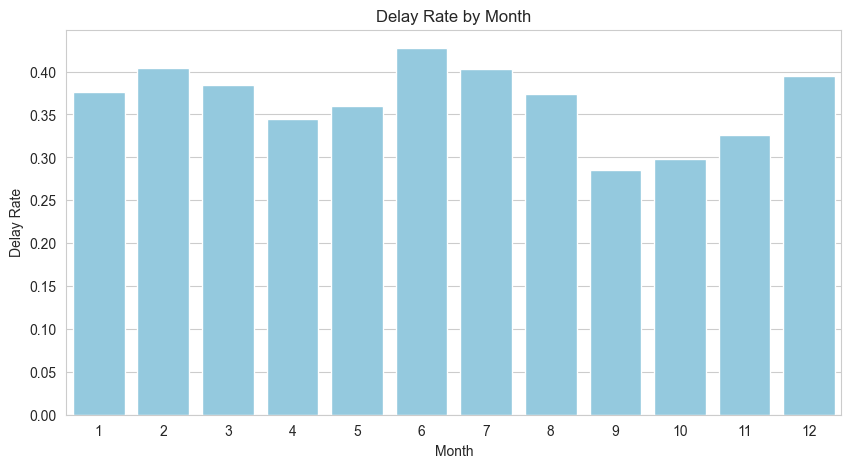

In [79]:
df2['MONTH'] = pd.to_datetime(df2['FL_DATE']).dt.month
month_delay_rate = df2.groupby('MONTH')['DEP_DELAY'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='MONTH', y='DEP_DELAY', data=month_delay_rate, color='skyblue')
plt.title('Delay Rate by Month')
plt.xlabel('Month')
plt.ylabel('Delay Rate')
plt.show()

<Figure size 800x300 with 0 Axes>

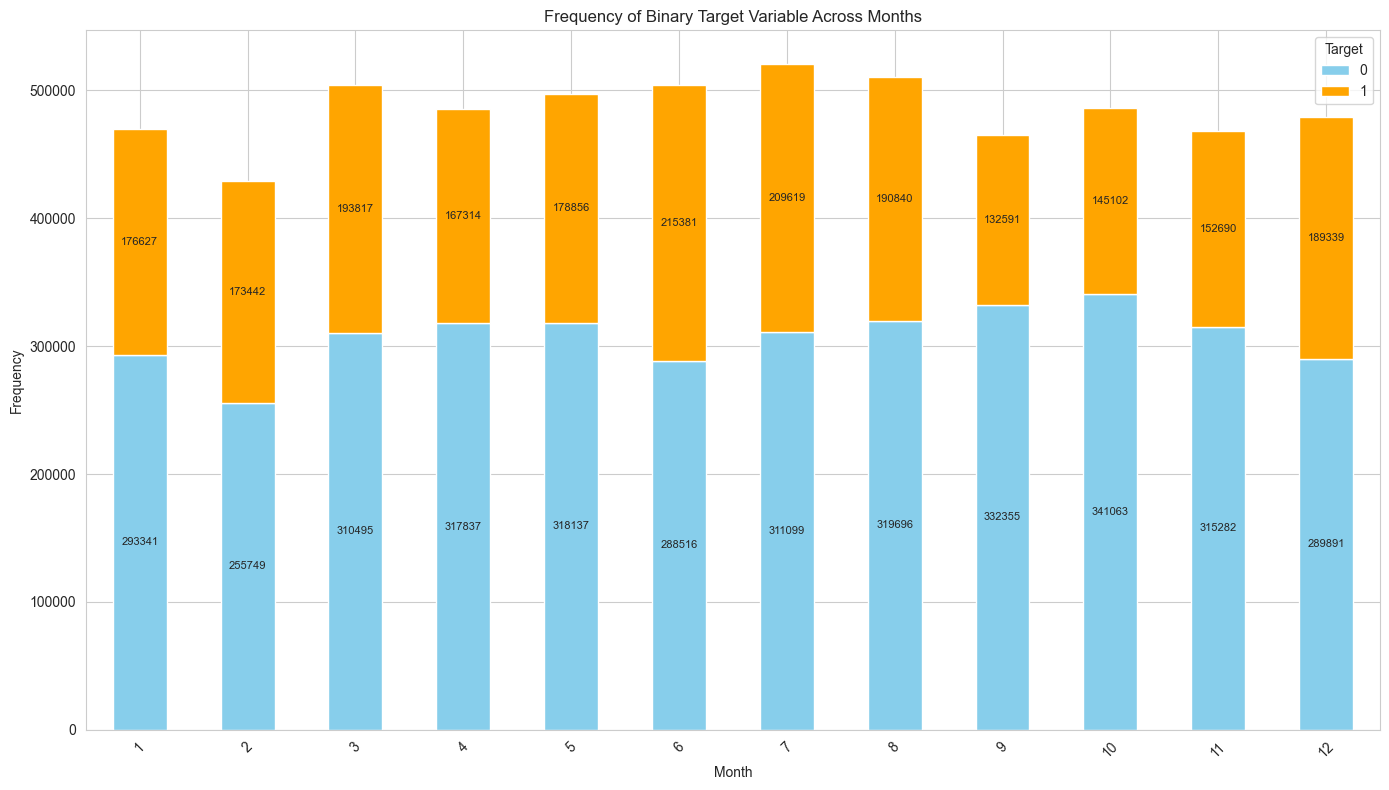

In [80]:
plt.figure(figsize=(8,3))
grouped = df2.groupby(['MONTH', 'DEP_DELAY']).size().unstack(fill_value=0)
ax = grouped.plot(kind='bar', stacked=True, figsize=(14, 8), color=['skyblue', 'orange'])
plt.title('Frequency of Binary Target Variable Across Months')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.legend(title='Target', labels=['0', '1'])
plt.xticks(rotation=45) 
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8)
plt.tight_layout()  
plt.show()

Flight delays vary by month, with certain months showing higher delay rates which could be attributed to seasonal factors such as weather conditions and holiday travel. 
<br>
Well, its good that we have scraped weather data for the modelling
<br>
Months with higher air traffic, such as July and August (peak vacation times), not only have a higher count of flights but also a significant portion of delayed flights. This seasonal effect highlights the impact of increased demand and potentially adverse weather conditions on flight delays.

## DAY OF WEEK

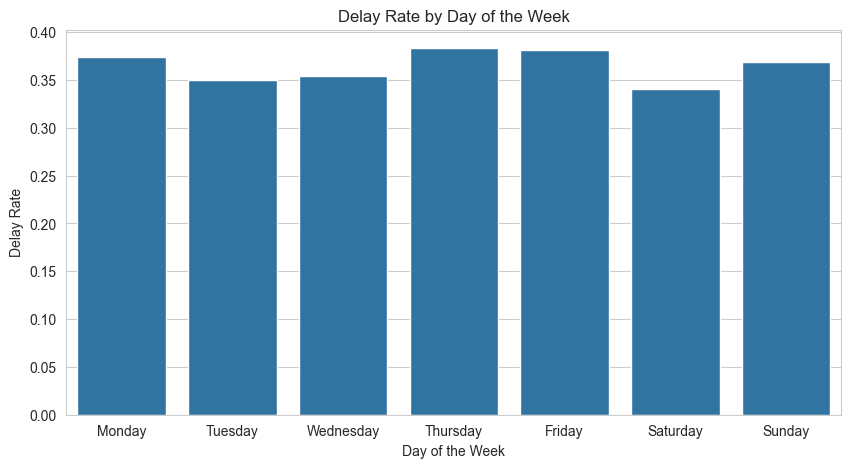

In [81]:
df2['DAY_OF_WEEK'] = pd.to_datetime(df2['FL_DATE']).dt.day_name()
day_of_week_delay_rate = df2.groupby('DAY_OF_WEEK')['DEP_DELAY'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='DAY_OF_WEEK', y='DEP_DELAY', data=day_of_week_delay_rate, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Delay Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delay Rate')
plt.show()


In [82]:
df2['DAY_OF_WEEK'].value_counts(normalize=True)

DAY_OF_WEEK
Thursday     0.149941
Monday       0.148742
Friday       0.148169
Wednesday    0.147085
Tuesday      0.145143
Sunday       0.140532
Saturday     0.120388
Name: proportion, dtype: float64

In [83]:
# Delay rates also vary by day, potentially reflecting differences in travel patterns between weekdays and weekends.

<Figure size 800x300 with 0 Axes>

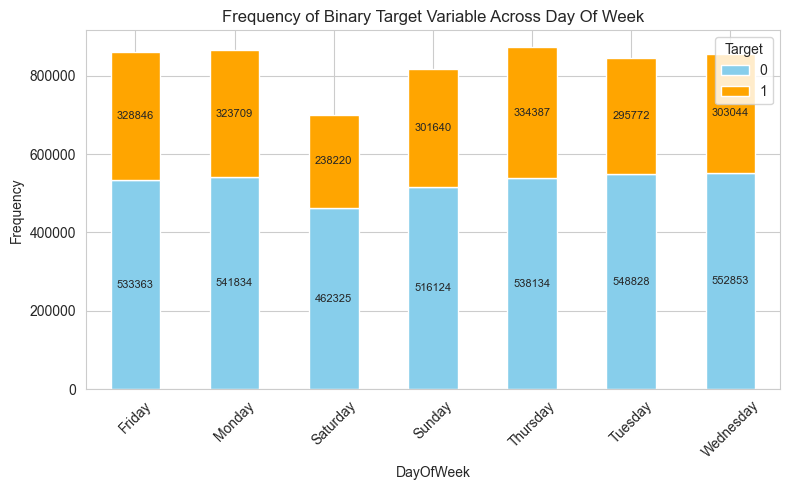

In [84]:
plt.figure(figsize=(8,3))
grouped = df2.groupby(['DAY_OF_WEEK', 'DEP_DELAY']).size().unstack(fill_value=0)
ax = grouped.plot(kind='bar', stacked=True, figsize=(8, 5), color=['skyblue', 'orange'])
plt.title('Frequency of Binary Target Variable Across Day Of Week')
plt.xlabel('DayOfWeek')
plt.ylabel('Frequency')
plt.legend(title='Target', labels=['0', '1'])
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8)
plt.tight_layout()  
plt.show()

The plot reveals that certain days (e.g., Thursday, Friday, Sunday) have higher delays. This pattern could be attributed to long weekend travel peaks and the start of the business week, leading to operational bottlenecks.

In [85]:
df2['CRS_DEP_TIME'] = df2['CRS_DEP_TIME'].apply(lambda x: f"{x:04}").apply(lambda x: f"{x[:2]}:{x[2:]}")
df2['HOUR'] = pd.to_datetime(df2['CRS_DEP_TIME'], format = '%H:%M').dt.hour

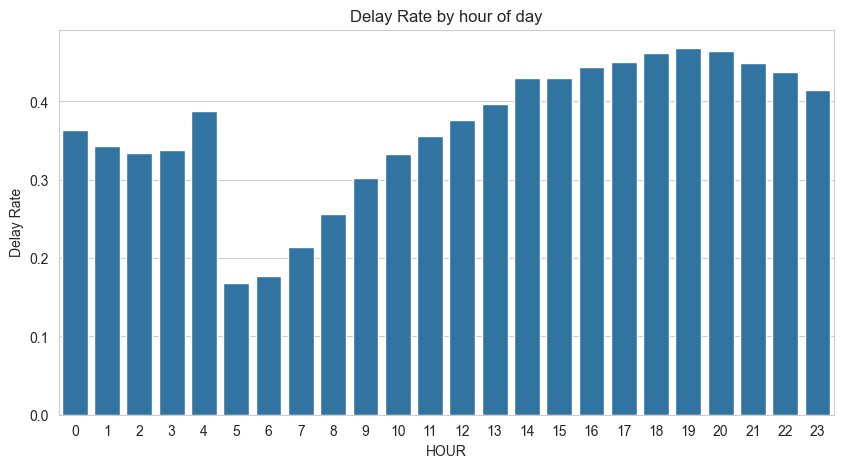

In [86]:
# df2['HOUR'] = pd.to_datetime(df2['FL_DATE']).dt.hour
day_of_week_delay_rate = df2.groupby('HOUR')['DEP_DELAY'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='HOUR', y='DEP_DELAY', data=day_of_week_delay_rate)
plt.title('Delay Rate by hour of day')
plt.xlabel('HOUR')
plt.ylabel('Delay Rate')
plt.show()

Flight delays exhibit clear patterns based on the hour of the day, with certain hours experiencing higher rates of delay.
<br>
Hour of the day is a valuable predictor, reflecting daily operational dynamics and air traffic volumes that affect delay likelihood.

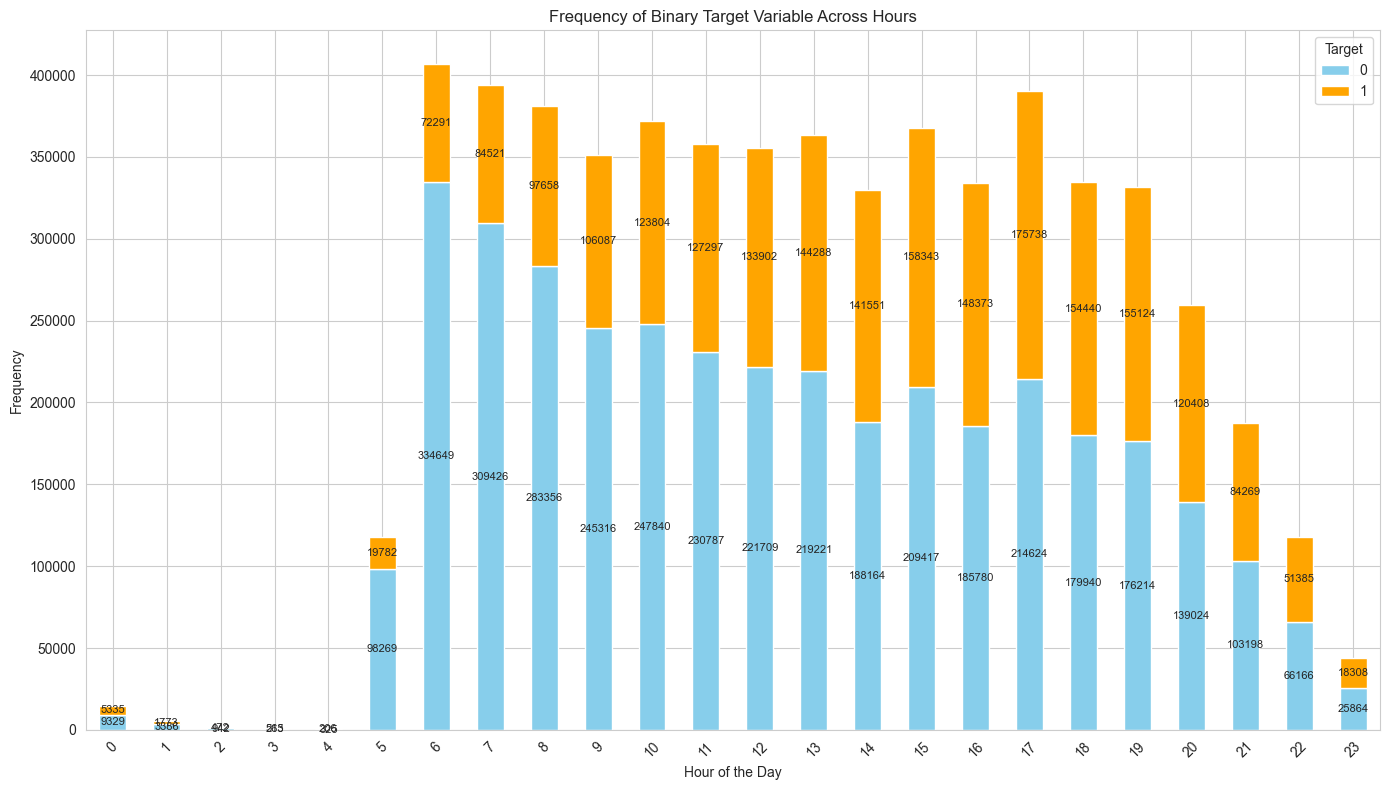

In [87]:
grouped = df2.groupby(['HOUR', 'DEP_DELAY']).size().unstack(fill_value=0)
ax = grouped.plot(kind='bar', stacked=True, figsize=(14, 8), color=['skyblue', 'orange'])
plt.title('Frequency of Binary Target Variable Across Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.legend(title='Target', labels=['0', '1'])
plt.xticks(rotation=45)  
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8)
plt.tight_layout() 
plt.show()

The distribution of delays across different hours of the day shows that early morning flights tend to have fewer delays, while late afternoon and evening flights have more. This pattern likely reflects the accumulation of delays throughout the day and higher air traffic volumes in the afternoon and evening.

### OP_CARRIER

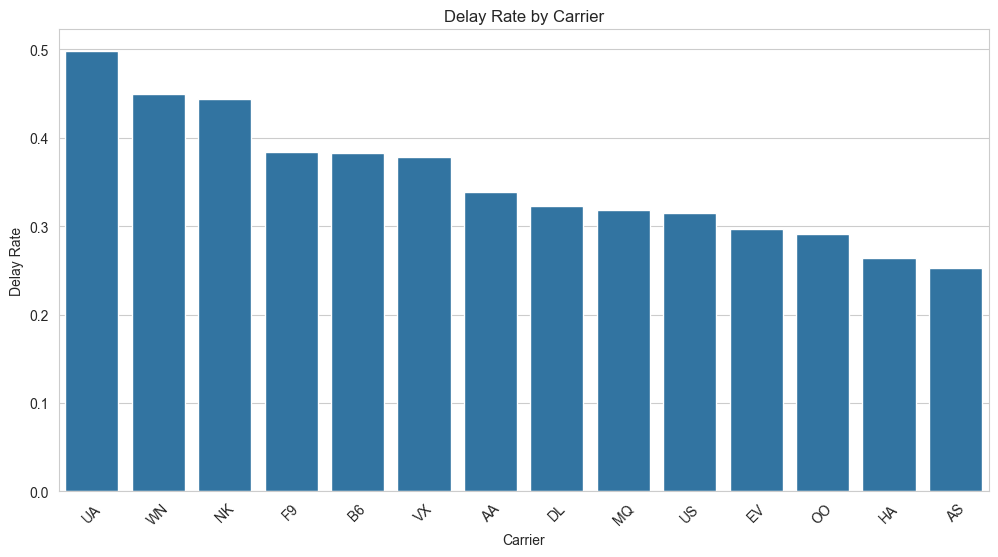

In [88]:
carrier_delay_rate = df2.groupby('OP_CARRIER')['DEP_DELAY'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='OP_CARRIER', y='DEP_DELAY', data=carrier_delay_rate, order=carrier_delay_rate.sort_values('DEP_DELAY', ascending=False)['OP_CARRIER'])
plt.title('Delay Rate by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Delay Rate')
plt.xticks(rotation=45)
plt.show()


There's noticeable variability in delay rates among carriers, suggesting differences in operational efficiency, scheduling practices, and perhaps geographic and hub influences.

<Figure size 800x300 with 0 Axes>

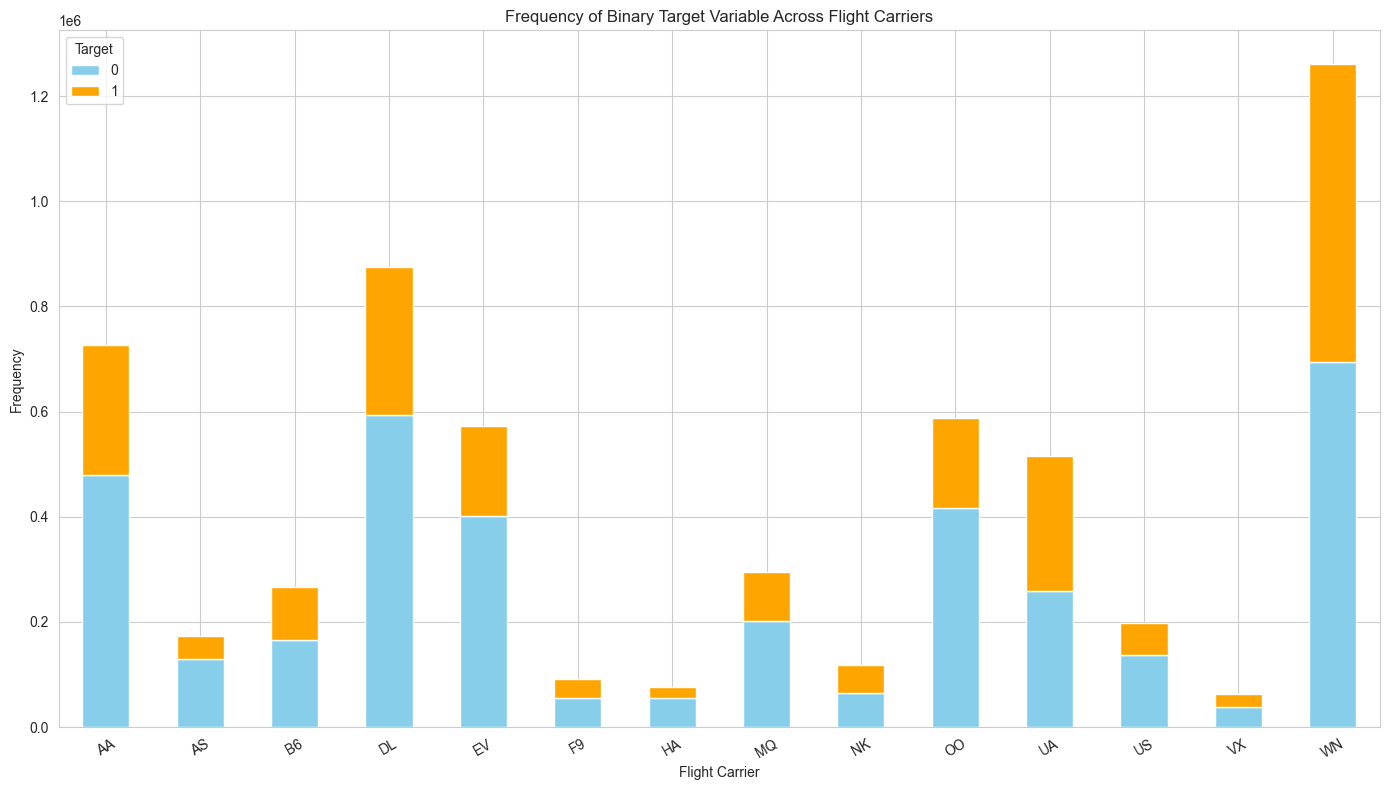

In [89]:
plt.figure(figsize=(8,3))
grouped = df2.groupby(['OP_CARRIER', 'DEP_DELAY']).size().unstack(fill_value=0)
grouped.plot(kind='bar', stacked=True, figsize=(14, 8), color=['skyblue', 'orange'])
plt.title('Frequency of Binary Target Variable Across Flight Carriers')
plt.xlabel('Flight Carrier')
plt.ylabel('Frequency')
plt.legend(title='Target', labels=['0', '1'])
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Carrier-specific information is highly predictive of delays. This variability among carriers can help the model identify which airlines are more prone to delays, potentially due to operational factors or route structures.